In [1]:
%%capture
pip install ultralytics

In [4]:
import torch
import PIL
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Set ROOT path
ROOT = Path("/content/drive/MyDrive/ErdosFall25/")

In [6]:
# Instantiate a YOLO model
model = YOLO(ROOT / "models/yolo11s_aug2_data4_best.pt")

# Example visualization

Let's try some visualizations as a gut check.

## Predicted bounding boxes

We will take a few random images from the validation set and display the predicted bounding boxes.

In [7]:
import os
import random

image_directory = ROOT / "data/detection2/yolo_split2/val/images"
image_files = [f for f in os.listdir(image_directory)
              if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Set a fixed random seed for reproducibility
random.seed(420)

# Choose a few random images (e.g., 10 images)
num_images_to_select = 10
random_images = random.sample(image_files,
                              min(num_images_to_select,
                                  len(image_files)))

print("Selected images:")
for img_name in random_images:
    print(img_name)

# You can now construct the full paths to these images
random_image_paths = [os.path.join(image_directory, img_name)
                      for img_name in random_images]

Selected images:
kvasir_images__cju5yjq1pmlgc0801z0t24bly.jpg
seq14__EndoCV2021_seq14_824.jpg
seq15_neg__seq15_neg_00498.jpg
kvasir_images__cju3xl264ingx0850rcf0rshj.jpg
kvasir_images__cju34ouumcznz07996gg1xq7v.jpg
kvasir_images__cju8at3s1qqqx0850hcq8nmnq.jpg
kvasir_images__cju1c3218411b08014g9f6gig.jpg
seq15_neg__seq15_neg_00363.jpg
seq14__EndoCV2021_seq14_64.jpg
seq14__EndoCV2021_seq14_668.jpg



image 1/1 /content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/images/kvasir_images__cju5yjq1pmlgc0801z0t24bly.jpg: 608x640 1 item, 63.6ms
Speed: 12.7ms preprocess, 63.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 640)


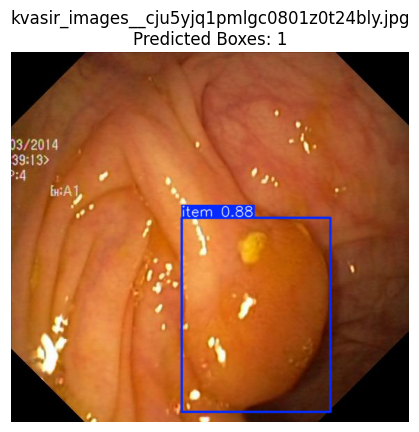


image 1/1 /content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/images/seq14__EndoCV2021_seq14_824.jpg: 480x640 (no detections), 64.3ms
Speed: 2.5ms preprocess, 64.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


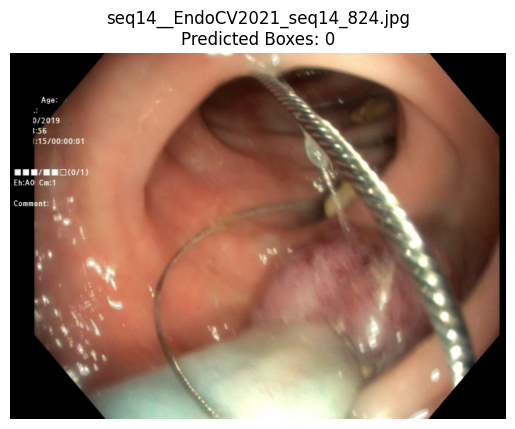


image 1/1 /content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/images/seq15_neg__seq15_neg_00498.jpg: 384x640 (no detections), 100.7ms
Speed: 2.9ms preprocess, 100.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


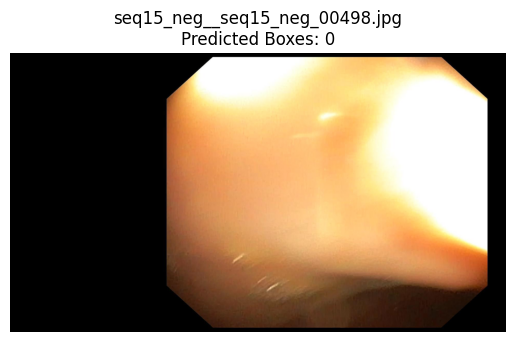


image 1/1 /content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/images/kvasir_images__cju3xl264ingx0850rcf0rshj.jpg: 576x640 1 item, 51.7ms
Speed: 2.5ms preprocess, 51.7ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)


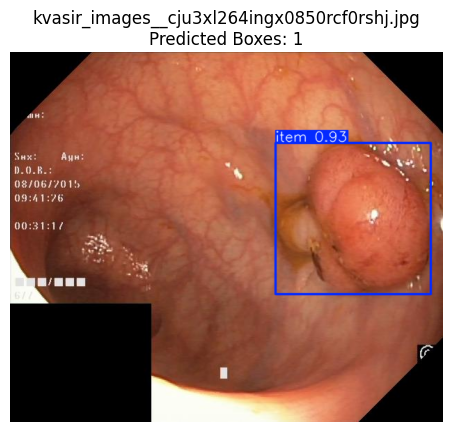


image 1/1 /content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/images/kvasir_images__cju34ouumcznz07996gg1xq7v.jpg: 576x640 1 item, 15.1ms
Speed: 2.4ms preprocess, 15.1ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 640)


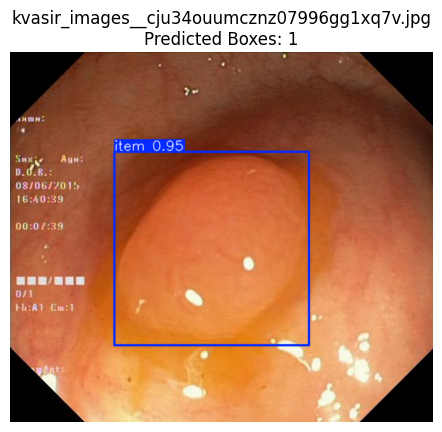


image 1/1 /content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/images/kvasir_images__cju8at3s1qqqx0850hcq8nmnq.jpg: 576x640 1 item, 15.1ms
Speed: 2.5ms preprocess, 15.1ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 640)


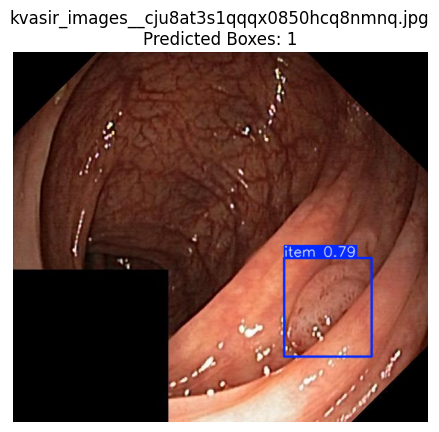


image 1/1 /content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/images/kvasir_images__cju1c3218411b08014g9f6gig.jpg: 576x640 1 item, 15.1ms
Speed: 2.4ms preprocess, 15.1ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 640)


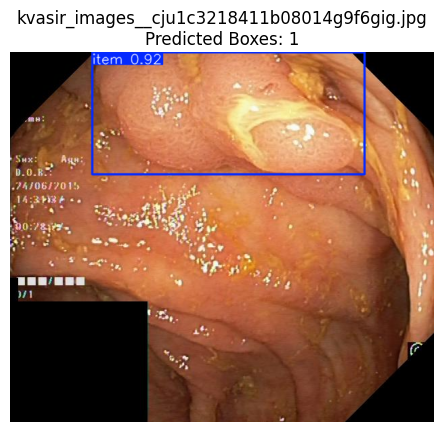


image 1/1 /content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/images/seq15_neg__seq15_neg_00363.jpg: 384x640 (no detections), 11.7ms
Speed: 2.1ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


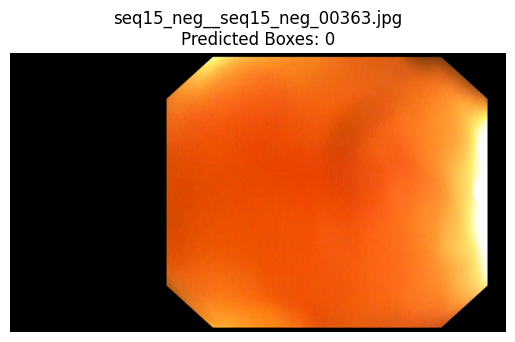


image 1/1 /content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/images/seq14__EndoCV2021_seq14_64.jpg: 480x640 1 item, 13.2ms
Speed: 2.5ms preprocess, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


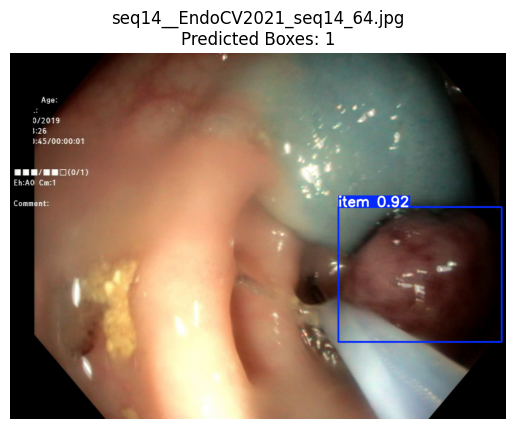


image 1/1 /content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/images/seq14__EndoCV2021_seq14_668.jpg: 480x640 2 items, 13.8ms
Speed: 3.8ms preprocess, 13.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


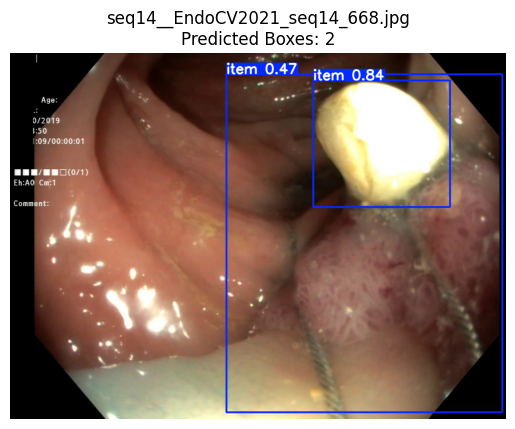

In [8]:
# Run inference and visualize results with matplotlib
import matplotlib.pyplot as plt

for image_path in random_image_paths:
    # Run inference on the image
    results = model.predict(image_path)

    # Process and display results for each image
    for r in results:
        im_array = r.plot()  # plot a BGR numpy array of predictions
        im_rgb = im_array[..., ::-1] # Convert BGR to RGB for matplotlib

        # Count the number of predicted bounding boxes
        num_boxes = len(r.boxes)

        # Get the image filename
        image_filename = Path(image_path).name

        # Create a matplotlib figure and axes
        fig, ax = plt.subplots(1)
        ax.imshow(im_rgb)

        # Set the title with filename and number of bounding boxes
        ax.set_title(f"{image_filename}\nPredicted Boxes: {num_boxes}")

        # Turn off axis
        ax.axis('off')

        # Display the plot
        plt.show()

## Ground truth bounding boxes

Now let's visualize the ground truth bounding boxes for the same images.

In [9]:
random_label_paths = []

for image_path in random_image_paths:
    # Correctly replace the 'images' directory with 'labels' and change extension to '.txt'
    label_path = image_path.replace("/images/", "/labels/").rsplit(".", 1)[0] + ".txt"
    random_label_paths.append(label_path)

print("Corresponding label paths:")
for label_path in random_label_paths:
    print(label_path)

Corresponding label paths:
/content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/labels/kvasir_images__cju5yjq1pmlgc0801z0t24bly.txt
/content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/labels/seq14__EndoCV2021_seq14_824.txt
/content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/labels/seq15_neg__seq15_neg_00498.txt
/content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/labels/kvasir_images__cju3xl264ingx0850rcf0rshj.txt
/content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/labels/kvasir_images__cju34ouumcznz07996gg1xq7v.txt
/content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/labels/kvasir_images__cju8at3s1qqqx0850hcq8nmnq.txt
/content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/labels/kvasir_images__cju1c3218411b08014g9f6gig.txt
/content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/labels/seq15_neg__seq15_neg_00363.txt
/content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2

In [10]:
ground_truth_annotations = []

for label_path in random_label_paths:
    image_annotations = []
    try:
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    class_id = int(parts[0])
                    center_x = float(parts[1])
                    center_y = float(parts[2])
                    width = float(parts[3])
                    height = float(parts[4])
                    image_annotations.append((class_id, center_x, center_y, width, height))
    except FileNotFoundError:
        print(f"Label file not found: {label_path}")
        # Append empty list if label file is missing
        image_annotations = []

    ground_truth_annotations.append(image_annotations)

# Print the parsed annotations to verify
for i, annotations in enumerate(ground_truth_annotations):
    print(f"Annotations for image {i+1}:")
    for annotation in annotations:
        print(annotation)

Annotations for image 1:
(0, 0.617544, 0.700943, 0.375439, 0.541509)
Annotations for image 2:
(0, 0.677778, 0.68797, 0.411111, 0.458647)
(0, 0.875, 0.605263, 0.094444, 0.218045)
(0, 0.888889, 0.729323, 0.011111, 0.015038)
Annotations for image 3:
Annotations for image 4:
(0, 0.797428, 0.450094, 0.350482, 0.40678)
Annotations for image 5:
(0, 0.480831, 0.523766, 0.453674, 0.513711)
Annotations for image 6:
(0, 0.756324, 0.690926, 0.200675, 0.243856)
Annotations for image 7:
(0, 0.508786, 0.166667, 0.627796, 0.333333)
Annotations for image 8:
Annotations for image 9:
(0, 0.822222, 0.616541, 0.322222, 0.390977)
Annotations for image 10:
(0, 0.736111, 0.609023, 0.505556, 0.676692)


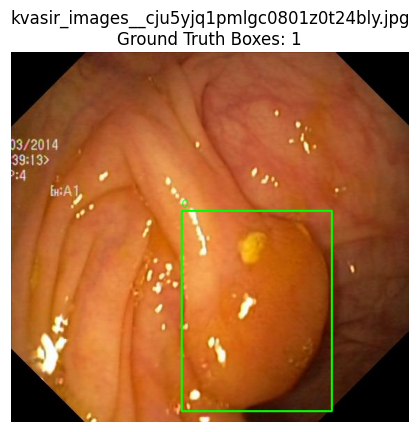

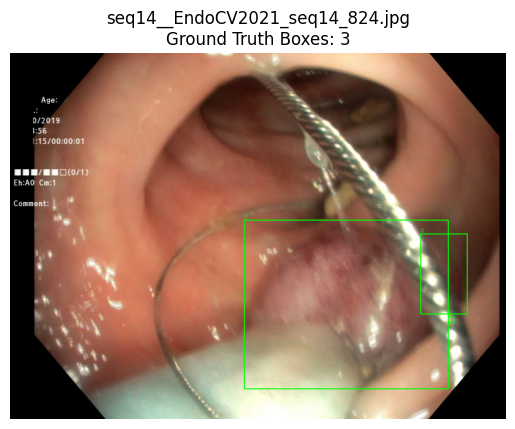

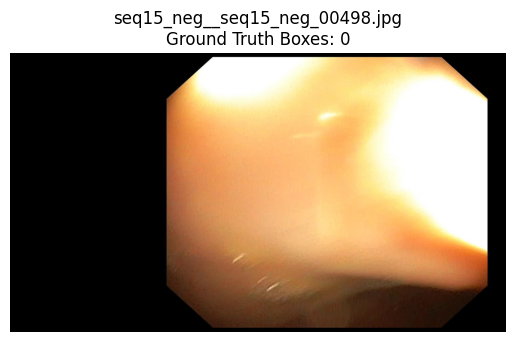

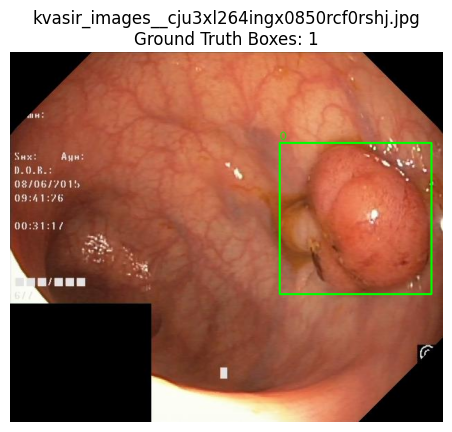

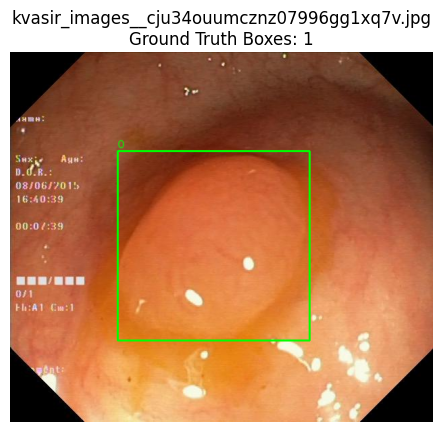

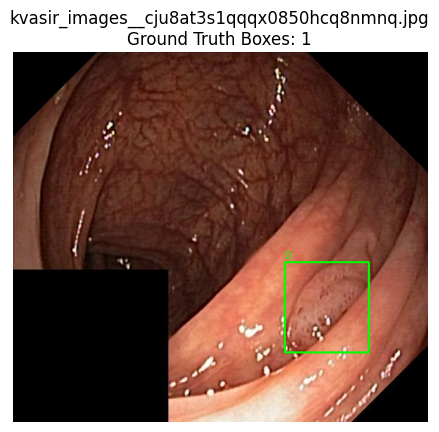

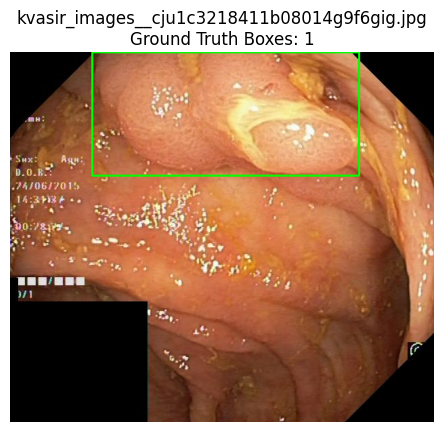

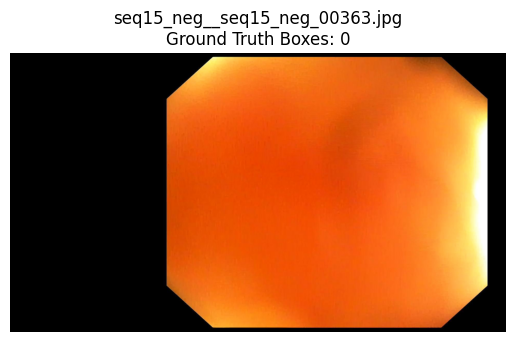

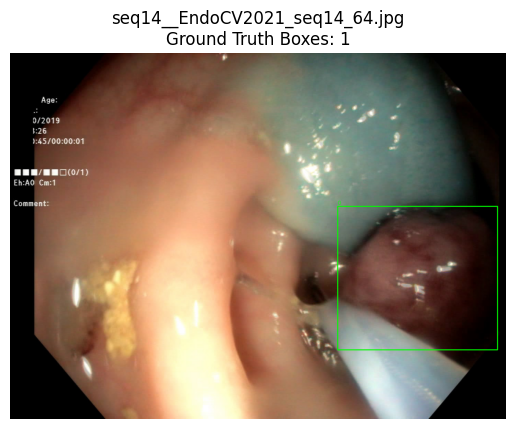

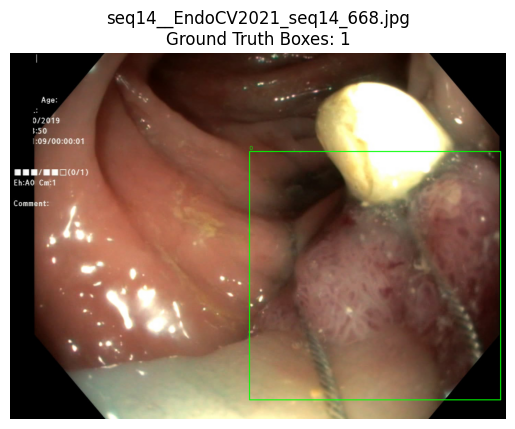

In [ ]:
# Visualize ground truth bounding boxes with matplotlib
import matplotlib.pyplot as plt
from pathlib import Path # Import Path to get the filename

for i, image_path in enumerate(random_image_paths):
    # Load the image using OpenCV
    img = cv2.imread(image_path)
    if img is None:
        print(f"Could not load image: {image_path}")
        continue

    img_height, img_width, _ = img.shape
    annotations = ground_truth_annotations[i]

    # Draw bounding boxes
    for annotation in annotations:
        class_id, center_x, center_y, width, height = annotation

        # Convert YOLO format (normalized) to pixel coordinates (x_min, y_min, x_max, y_max)
        x_center = center_x * img_width
        y_center = center_y * img_height
        box_width = width * img_width
        box_height = height * img_height

        x_min = int(x_center - box_width / 2)
        y_min = int(y_center - box_height / 2)
        x_max = int(x_center + box_width / 2)
        y_max = int(y_center + box_height / 2)

        # Define color for bounding box (e.g., green for ground truth)
        color = (0, 255, 0) # BGR color

        # Draw rectangle on the image
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, 2) # 2 is the thickness

        # Optionally, put class text
        # Note: You'll need a list of class names to display the actual class name
        # For now, we'll just display the class_id
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        font_thickness = 1
        text = str(class_id)
        text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)
        text_x = x_min
        text_y = y_min - 5 # Position text slightly above the box
        cv2.putText(img, text, (text_x, text_y), font, font_scale, color, font_thickness, cv2.LINE_AA)


    # Convert BGR to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Count the number of ground truth bounding boxes
    num_boxes = len(annotations)

    # Get the image filename
    image_filename = Path(image_path).name

    # Create a matplotlib figure and axes
    fig, ax = plt.subplots(1)
    ax.imshow(img_rgb)

    # Set the title with filename and number of bounding boxes
    ax.set_title(f"{image_filename}\nGround Truth Boxes: {num_boxes}")

    # Turn off axis
    ax.axis('off')

    # Display the plot
    plt.show()

In [ ]:
# This is just me looking at annotations.json
import json

annotations_file_path = "/content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/annotations.json"

try:
    with open(annotations_file_path, 'r') as f:
        annotations_data = json.load(f)
        print(json.dumps(annotations_data, indent=4))
except FileNotFoundError:
    print(f"Error: The file was not found at {annotations_file_path}")
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from the file at {annotations_file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

{
    "images": [
        {
            "id": 1,
            "file_name": "/content/drive/.shortcut-targets-by-id/1XLx16XlBJaJheXj1wkmVS1t8xkB8qbJH/yolo_split2/val/images/kvasir_images__cju0qkwl35piu0993l0dewei2.jpg",
            "width": 622,
            "height": 529
        },
        {
            "id": 2,
            "file_name": "/content/drive/.shortcut-targets-by-id/1XLx16XlBJaJheXj1wkmVS1t8xkB8qbJH/yolo_split2/val/images/kvasir_images__cju0qoxqj9q6s0835b43399p4.jpg",
            "width": 1348,
            "height": 1070
        },
        {
            "id": 3,
            "file_name": "/content/drive/.shortcut-targets-by-id/1XLx16XlBJaJheXj1wkmVS1t8xkB8qbJH/yolo_split2/val/images/kvasir_images__cju0qx73cjw570799j4n5cjze.jpg",
            "width": 619,
            "height": 529
        },
        {
            "id": 4,
            "file_name": "/content/drive/.shortcut-targets-by-id/1XLx16XlBJaJheXj1wkmVS1t8xkB8qbJH/yolo_split2/val/images/kvasir_images__cju0roawvklrq0799vmjorw

# Model evaluation

## Setup

In [11]:
# Apparently, ultralytics wants a YAML file for running model.val()
import yaml
from pathlib import Path

# Define the path to dataset directory (relative to ROOT)
data_dir = ROOT / "data/detection2/yolo_split2"

# Define the paths to training and validation data
train_img_dir = data_dir / "train/images"
train_label_dir = data_dir / "train/labels"
val_img_dir = data_dir / "val/images"
val_label_dir = data_dir / "val/labels"

# Define class names
class_names = ["polyp"]

# Create the dictionary for the YAML file
data_yaml = {
    'train': str(train_img_dir),
    'val': str(val_img_dir),
    'test': None, # If you have a test set, provide the path here
    'nc': len(class_names),
    'names': class_names
}

# Define the path to save the YAML file
yaml_file_path = data_dir / "dataset.yaml"

# Write the dictionary to a YAML file
with open(yaml_file_path, 'w') as f:
    yaml.dump(data_yaml, f, default_flow_style=None)

print(f"Dataset YAML file created at: {yaml_file_path}")
print("\nContents of the YAML file:")
print(yaml.dump(data_yaml, default_flow_style=None))

Dataset YAML file created at: /content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/dataset.yaml

Contents of the YAML file:
names: [polyp]
nc: 1
test: null
train: /content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/train/images
val: /content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/images



## Performance on validation set

In [12]:
# Run model evaluation on the validation set
# The data argument points to the YAML file we created
results = model.val(data=yaml_file_path,
                    project=ROOT / "runs",
                    name="yolo11s_aug2_data4_best")

# Display evaluation results
print(results)

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.8±0.2 ms, read: 0.1±0.1 MB/s, size: 73.6 KB)
val: Scanning /content/drive/.shortcut-targets-by-id/1rSspJ8TOzAkXxgloqEGMq0_RcHVl9YET/ErdosFall25/data/detection2/yolo_split2/val/labels.cache... 1666 images, 338 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1666/1666 2.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 105/105 1.8it/s 58.2s
                   all       1666       1446      0.854      0.774      0.849      0.661
Speed: 1.0ms preprocess, 7.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/drive/.shortcut-targets-by-id/1rSspJ8TOzAkXxgloqEGMq0_RcHVl9YET/ErdosFall25/runs/yolo11s_aug2_data4_best3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metr

Evaluation Results:
mAP@0.5-0.95: 0.6609333971238879
mAP@0.50: 0.8484657319877434
mAP@0.75: 0.7249696452056321
Average Precision: [    0.85279]
Average Recall: [    0.77318]


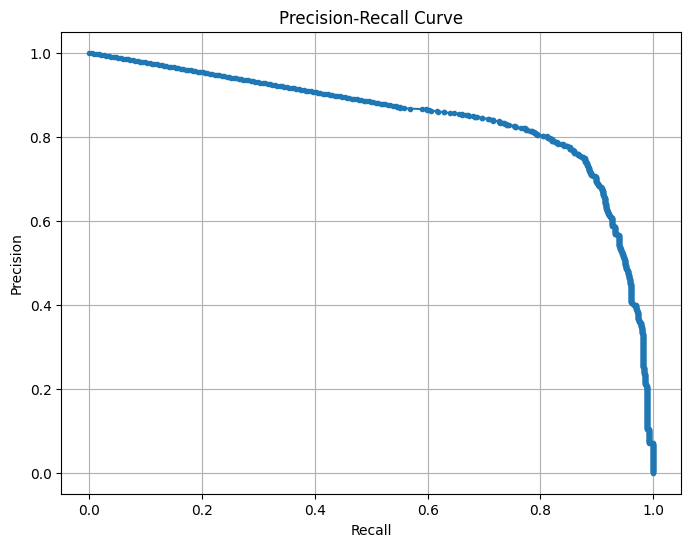

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy for array manipulation

# Display key metrics
print("Evaluation Results:")
print(f"mAP@0.5-0.95: {results.box.map}")
print(f"mAP@0.50: {results.box.map50}")
print(f"mAP@0.75: {results.box.map75}")
print(f"Average Precision: {results.box.p}")
print(f"Average Recall: {results.box.r}")

# Note: IoU (Intersection over Union) is the basis for the mAP metrics.
# mAP@0.50 means mAP calculated at an IoU threshold of 0.50.
# mAP@0.75 means mAP calculated at an IoU threshold of 0.75.
# mAP@0.5-0.95 averages mAP over IoU thresholds from 0.50 to 0.95.

# You can also access and plot curves, for example, the Precision-Recall curve
# The curves data is typically stored in results.curves_results
# Let's assume the first curve is the Precision-Recall curve for the first class (index 0)
# You might need to inspect results.curves_results to confirm the index and content
if results.curves_results and len(results.curves_results) > 0:
    try:
        # Assuming the first item in curves_results is the PR curve for the first class
        # The structure is usually [precision_values, recall_values, confidence_thresholds]
        # We need to ensure these are 1D arrays for plotting
        precision = np.array(results.curves_results[0][0]).flatten()
        recall = np.array(results.curves_results[0][1]).flatten()

        # Ensure precision and recall have the same length
        if len(precision) == len(recall) and len(precision) > 0:
            plt.figure(figsize=(8, 6))
            plt.plot(recall, precision, marker='.')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title('Precision-Recall Curve')
            plt.grid(True)
            plt.show()
        else:
            print("Precision and Recall data have different lengths or are empty and cannot be plotted.")

    except IndexError:
        print("Could not find data for plotting Precision-Recall curve in results.curves_results.")
    except Exception as e:
        print(f"An error occurred while trying to plot the Precision-Recall curve: {e}")
else:
    print("No curve results available for plotting.")

## Inference to find best and worst performing images

In [ ]:
import os

# Get all image paths for the validation set
image_directory = ROOT / "data/detection2/yolo_split2/val/images"
all_image_files = [f for f in os.listdir(image_directory)
                   if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
all_image_paths = [os.path.join(image_directory, img_name) for img_name in all_image_files]

print(f"Found {len(all_image_paths)} images in the validation set.")

Found 1666 images in the validation set.


In [ ]:
# Load all ground truth annotations

all_ground_truth_annotations = []
all_label_paths = []

for image_path in all_image_paths:
    # Replace 'images' with 'labels' and change extension to '.txt'
    label_path = (image_path.replace("/images/", "/labels/").rsplit(".", 1)[0]
                  + ".txt")
    all_label_paths.append(label_path)

for label_path in all_label_paths:
    image_annotations = []
    try:
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    class_id = int(parts[0])
                    center_x = float(parts[1])
                    center_y = float(parts[2])
                    width = float(parts[3])
                    height = float(parts[4])
                    image_annotations.append((class_id, center_x, center_y, width, height))
    except FileNotFoundError:
        # If label file is missing, append empty list
        image_annotations = []

    all_ground_truth_annotations.append(image_annotations)

print(f"Loaded ground truth annotations for {len(all_ground_truth_annotations)} images.")

# Print a sample of non-empty annotations to verify
print("\nSample of non-empty annotations:")
count = 0
for i, annotations in enumerate(all_ground_truth_annotations):
    if annotations: # Check if the annotation list is not empty
        print(f"Annotations for image {i+1} (Image Path: {all_image_paths[i]}):")
        for annotation in annotations:
            print(annotation)
        count += 1
        if count >= 5: # Print only the first 5 non-empty annotations
            break

Loaded ground truth annotations for 1666 images.

Sample of non-empty annotations:
Annotations for image 1 (Image Path: /content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/images/kvasir_images__cju5u8gz4kj5b07552e2wpkwp.jpg):
(0, 0.631348, 0.354991, 0.674256, 0.702448)
Annotations for image 2 (Image Path: /content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/images/kvasir_images__cju6vifjlv55z0987un6y4zdo.jpg):
(0, 0.417203, 0.499055, 0.834405, 0.99811)
Annotations for image 3 (Image Path: /content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/images/kvasir_images__cju0ue769mxii08019zqgdbxn.jpg):
(0, 0.41853, 0.295247, 0.255591, 0.28702)
Annotations for image 4 (Image Path: /content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/images/kvasir_images__cju5wkonqlrl409877y8zvnub.jpg):
(0, 0.720096, 0.486289, 0.457735, 0.537477)
Annotations for image 5 (Image Path: /content/drive/MyDrive/ErdosFall25/data/detection2/yolo_split2/val/images/k

In [ ]:
# Perform inference on the entire validation set and categorize predictions

all_predicted_results = []
for image_path in all_image_paths:
    # Run inference on the image and store the detailed results
    # Setting verbose=False to avoid printing progress for each image
    results = model.predict(image_path, verbose=False)
    all_predicted_results.append(results[0]) # Assuming predict returns a list with one Results object per image

print(f"Completed inference on {len(all_predicted_results)} images.")

# Categorize predictions as TP, FP, FN, and identify TN

# Define an IoU threshold for matching
iou_threshold = 0.5

# Lists to store categorized results
true_positives = [] # Matched predicted boxes with IoU >= threshold and correct class
false_positives = [] # Predicted boxes not matched to any ground truth or incorrect class
false_negatives = [] # Ground truth boxes not matched by any predicted box
true_negatives_images = [] # Images with no ground truth and no predictions

# Iterate through each image's results and ground truth
for i, image_results in enumerate(all_predicted_results):
    image_path = all_image_paths[i]
    image_annotations = all_ground_truth_annotations[i]

    predicted_boxes = image_results.boxes.xyxy.cpu().numpy()
    confidence_scores = image_results.boxes.conf.cpu().numpy()
    predicted_class_ids = image_results.boxes.cls.cpu().numpy()

    # Convert ground truth annotations to pixel coordinates
    img = cv2.imread(image_path)
    img_height, img_width, _ = img.shape
    ground_truth_boxes = []
    ground_truth_class_ids = []
    for annotation in image_annotations:
        class_id, center_x, center_y, width, height = annotation
        x_center = center_x * img_width
        y_center = center_y * img_height
        box_width = width * img_width
        box_height = height * img_height
        x_min = int(x_center - box_width / 2)
        y_min = int(y_center - box_height / 2)
        x_max = int(x_center + box_width / 2)
        y_max = int(y_center + box_height / 2)
        ground_truth_boxes.append([x_min, y_min, x_max, y_max])
        ground_truth_class_ids.append(class_id)

    ground_truth_boxes = np.array(ground_truth_boxes)
    ground_truth_class_ids = np.array(ground_truth_class_ids)

    # --- Debugging for specific image ---
    #if Path(image_path).name == 'kvasir_images__cju7dda8w2br20818zhsuz8s7.jpg':
    #    print(f"\nDebugging for image: {Path(image_path).name}")
    #    print(f"  Ground Truth Annotations Loaded: {image_annotations}")
    #    print(f"  Predicted Boxes: {predicted_boxes}")
    #    print(f"  Predicted Confidences: {confidence_scores}")
    #    print(f"  Predicted Classes: {predicted_class_ids}")
    # --- End Debugging ---


    # Handle True Negatives
    if len(ground_truth_boxes) == 0 and len(predicted_boxes) == 0:
        true_negatives_images.append({'image_path': image_path})
        continue # Move to the next image

    # Match predicted boxes to ground truth boxes to identify TP, FP, FN
    matched_gt_indices = set() # To keep track of matched ground truth boxes

    for j in range(len(predicted_boxes)):
        pred_box = predicted_boxes[j]
        pred_conf = confidence_scores[j]
        pred_class = predicted_class_ids[j]

        best_iou = 0
        best_match_gt_idx = -1

        # Find the best matching ground truth box for the current predicted box
        for k in range(len(ground_truth_boxes)):
            gt_box = ground_truth_boxes[k]
            gt_class = ground_truth_class_ids[k]

            # Calculate IoU
            # Determine the (x, y)-coordinates of the intersection rectangle
            xA = max(pred_box[0], gt_box[0])
            yA = max(pred_box[1], gt_box[1])
            xB = min(pred_box[2], gt_box[2])
            yB = min(pred_box[3], gt_box[3])

            # Compute the area of intersection rectangle
            interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

            # Compute the area of both the prediction and ground-truth rectangles
            predArea = (pred_box[2] - pred_box[0] + 1) * (pred_box[3] - pred_box[1] + 1)
            gtArea = (gt_box[2] - gt_box[0] + 1) * (gt_box[3] - gt_box[1] + 1)

            # Compute the intersection over union
            iou = interArea / float(predArea + gtArea - interArea) if (predArea + gtArea - interArea) > 0 else 0

            # --- Debugging for specific image ---
            if Path(image_path).name == 'kvasir_images__cju7dda8w2br20818zhsuz8s7.jpg':
                print(f"    Comparing Pred Box {j} ({pred_box}) with GT Box {k} ({gt_box}): IoU = {iou:.4f}")
            # --- End Debugging ---

            if iou > best_iou:
                best_iou = iou
                best_match_gt_idx = k

        # Categorize the predicted box
        if best_iou >= iou_threshold and best_match_gt_idx != -1 and predicted_class_ids[j] == ground_truth_class_ids[best_match_gt_idx] and best_match_gt_idx not in matched_gt_indices:
            # True Positive: Predicted box matches a ground truth box with sufficient IoU and correct class
            true_positives.append({
                'image_path': image_path,
                'predicted_box': pred_box,
                'confidence': pred_conf,
                'predicted_class': pred_class,
                'ground_truth_box': ground_truth_boxes[best_match_gt_idx],
                'ground_truth_class': ground_truth_class_ids[best_match_gt_idx],
                'iou': best_iou
            })
            matched_gt_indices.add(best_match_gt_idx) # Mark ground truth box as matched
        else:
            # False Positive: Predicted box does not match any ground truth box with sufficient IoU and correct class,
            # OR it matched a ground truth box that was already matched by a higher-confidence prediction (this simple logic doesn't handle that case perfectly, but it's a reasonable approximation)
             false_positives.append({
                'image_path': image_path,
                'predicted_box': pred_box,
                'confidence': pred_conf,
                'predicted_class': pred_class
            })

    # Identify False Negatives (ground truth boxes that were not matched by any predicted box)
    for k in range(len(ground_truth_boxes)):
        if k not in matched_gt_indices:
            false_negatives.append({
                'image_path': image_path,
                'ground_truth_box': ground_truth_boxes[k],
                'ground_truth_class': ground_truth_class_ids[k]
            })

print(f"Categorization complete:")
print(f"  True Positives: {len(true_positives)}")
print(f"  False Positives: {len(false_positives)}")
print(f"  False Negatives: {len(false_negatives)}")
print(f"  True Negatives (images with no detections and no ground truth): {len(true_negatives_images)}")

Completed inference on 1666 images.

Debugging for image: kvasir_images__cju7dda8w2br20818zhsuz8s7.jpg
  Ground Truth Annotations Loaded: [(0, 0.593972, 0.608491, 0.673759, 0.756604)]
  Predicted Boxes: [[     141.59      124.86      529.71      524.25]]
  Predicted Confidences: [    0.97216]
  Predicted Classes: [          0]
    Comparing Pred Box 0 ([     141.59      124.86      529.71      524.25]) with GT Box 0 ([145 122 525 523]): IoU = 0.9693
Categorization complete:
  True Positives: 1120
  False Positives: 226
  False Negatives: 326
  True Negatives (images with no detections and no ground truth): 310


In [ ]:
import random
import numpy as np

num_examples_to_select = 5

# Select Top True Positives by Confidence
# Sort true positives by confidence in descending order
sorted_true_positives = sorted(true_positives, key=lambda x: x['confidence'], reverse=True)
top_true_positives = sorted_true_positives[:num_examples_to_select]

print(f"Selected {len(top_true_positives)} Top True Positives (by Confidence):")
for tp in top_true_positives:
    print(f"  Image: {Path(tp['image_path']).name}, Confidence: {tp['confidence']:.4f}, IoU: {tp['iou']:.4f}")

# Select Worst False Positives by Confidence
# Sort false positives by confidence in descending order
sorted_false_positives = sorted(false_positives, key=lambda x: x['confidence'], reverse=True)
worst_false_positives = sorted_false_positives[:num_examples_to_select]

print(f"\nSelected {len(worst_false_positives)} Worst False Positives (by Confidence):")
for fp in worst_false_positives:
    print(f"  Image: {Path(fp['image_path']).name}, Confidence: {fp['confidence']:.4f}")

# Select Worst False Negatives by Size (Area)
# Calculate area for False Negatives (using pixel coordinates)
def bbox_area(bbox):
    x_min, y_min, x_max, y_max = bbox
    return (x_max - x_min) * (y_max - y_min)

# Add area to false_negatives list for sorting
for fn in false_negatives:
    fn['area'] = bbox_area(fn['ground_truth_box'])

# Sort false negatives by area in descending order
sorted_false_negatives = sorted(false_negatives, key=lambda x: x['area'], reverse=True)
worst_false_negatives = sorted_false_negatives[:num_examples_to_select]

print(f"\nSelected {len(worst_false_negatives)} Worst False Negatives (by Largest Area):")
for fn in worst_false_negatives:
     print(f"  Image: {Path(fn['image_path']).name}, GT Area: {fn['area']:.2f}")

# Select Random True Negatives
# Ensure there are enough true negatives to sample from
num_tn_to_select = min(num_examples_to_select, len(true_negatives_images))
random_true_negatives = random.sample(true_negatives_images, num_tn_to_select)

print(f"\nSelected {len(random_true_negatives)} Random True Negatives:")
for tn in random_true_negatives:
    print(f"  Image: {Path(tn['image_path']).name}")

Selected 5 Top True Positives (by Confidence):
  Image: kvasir_images__cju7dda8w2br20818zhsuz8s7.jpg, Confidence: 0.9722, IoU: 0.9693
  Image: kvasir_images__cju7d7tly27h408016fyp5nr7.jpg, Confidence: 0.9592, IoU: 0.9197
  Image: single__C3_EndoCV2021_00127.jpg, Confidence: 0.9573, IoU: 0.9681
  Image: kvasir_images__cju45ty6zn9oz0850qy4qnck1.jpg, Confidence: 0.9569, IoU: 0.9643
  Image: kvasir_images__cju7bgnvb1sf808717qa799ir.jpg, Confidence: 0.9530, IoU: 0.9867

Selected 5 Worst False Positives (by Confidence):
  Image: kvasir_images__ck2bxiswtxuw80838qkisqjwz.jpg, Confidence: 0.9330
  Image: kvasir_images__cju3tsh4lfsok0987w6x3a0v1.jpg, Confidence: 0.9285
  Image: kvasir_images__cju5vutu7ll8w0871dfp92n9p.jpg, Confidence: 0.9278
  Image: kvasir_images__cju7ey10f2rvf0871bwbi9x82.jpg, Confidence: 0.9277
  Image: kvasir_images__cju3u1c8tfyqx08503iedc3mx.jpg, Confidence: 0.9266

Selected 5 Worst False Negatives (by Largest Area):
  Image: kvasir_images__cju8dqkrqu83i0818ev74qpxq.jpg, GT

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pathlib import Path

# Define a function to visualize an image with both predicted and ground truth boxes
def visualize_boxes(image_path, predicted_boxes_info, ground_truth_boxes_info, title):
    """
    Visualizes an image with predicted and ground truth bounding boxes.

    Args:
        image_path (str): Path to the image file.
        predicted_boxes_info (list): List of dictionaries for predicted boxes,
                                     each with 'box', 'confidence', 'class'.
        ground_truth_boxes_info (list): List of dictionaries for ground truth boxes,
                                        each with 'box', 'class'.
        title (str): Title for the plot.
    """
    img = cv2.imread(image_path)
    if img is None:
        print(f"Could not load image: {image_path}")
        return

    img_height, img_width, _ = img.shape
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB for matplotlib

    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(img_rgb)

    # Draw Ground Truth boxes (e.g., green)
    for gt_info in ground_truth_boxes_info:
        gt_box = gt_info['box']
        gt_class = gt_info['class']
        x_min, y_min, x_max, y_max = gt_box
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                             linewidth=2, edgecolor='green', facecolor='none', label=f'GT Class: {gt_class}')
        ax.add_patch(rect)
        # Optionally add class label
        # ax.text(x_min, y_min - 10, f'GT Class: {gt_class}', color='green', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))


    # Draw Predicted boxes (e.g., red)
    for pred_info in predicted_boxes_info:
        pred_box = pred_info['box']
        pred_conf = pred_info['confidence']
        pred_class = pred_info['class']
        x_min, y_min, x_max, y_max = pred_box
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                             linewidth=2, edgecolor='red', facecolor='none', label=f'Pred Class: {pred_class}, Conf: {pred_conf:.2f}')
        ax.add_patch(rect)
        # Add confidence score and class label
        ax.text(x_min, y_min - 5, f'Pred: {pred_class}, Conf: {pred_conf:.2f}', color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))


    ax.set_title(title)
    ax.axis('off')
    plt.show()

# --- Visualize Exemplary Images ---

print("--- Visualizing Exemplary True Positives ---")
for i, tp_info in enumerate(top_true_positives):
    image_path = tp_info['image_path']
    # For TP, the predicted box is matched to a ground truth box
    predicted_box_info = [{'box': tp_info['predicted_box'], 'confidence': tp_info['confidence'], 'class': tp_info['predicted_class']}]
    ground_truth_box_info = [{'box': tp_info['ground_truth_box'], 'class': tp_info['ground_truth_class']}]
    title = f"Top TP {i+1}: {Path(image_path).name}\nConfidence: {tp_info['confidence']:.4f}, IoU: {tp_info['iou']:.4f}"
    visualize_boxes(image_path, predicted_box_info, ground_truth_box_info, title)

print("\n--- Visualizing Exemplary False Positives (Highest Confidence) ---")
# For FP, there is a predicted box but no matched ground truth box in the analysis
# We need to find the actual ground truth boxes for these images to display them alongside the FP
for i, fp_info in enumerate(worst_false_positives):
    image_path = fp_info['image_path']
    predicted_box_info = [{'box': fp_info['predicted_box'], 'confidence': fp_info['confidence'], 'class': fp_info['predicted_class']}]

    # Find the corresponding ground truth annotations for this image
    # We need to search in all_ground_truth_annotations using image_path
    img_index = all_image_paths.index(image_path)
    image_annotations_yolo = all_ground_truth_annotations[img_index]

    # Convert ground truth annotations from YOLO format to pixel coordinates for visualization
    img = cv2.imread(image_path)
    img_height, img_width, _ = img.shape
    ground_truth_boxes_info = []
    for annotation in image_annotations_yolo:
        class_id, center_x, center_y, width, height = annotation
        x_center = center_x * img_width
        y_center = center_y * img_height
        box_width = width * img_width
        box_height = height * img_height
        x_min = int(x_center - box_width / 2)
        y_min = int(y_center - box_height / 2)
        x_max = int(x_center + box_width / 2)
        y_max = int(y_center + box_height / 2)
        ground_truth_boxes_info.append({'box': [x_min, y_min, x_max, y_max], 'class': class_id})

    title = f"Worst FP {i+1}: {Path(image_path).name}\nConfidence: {fp_info['confidence']:.4f}"
    visualize_boxes(image_path, predicted_box_info, ground_truth_boxes_info, title)


print("\n--- Visualizing Exemplary False Negatives (Largest Area) ---")
# For FN, there is a ground truth box but no matched predicted box in the analysis
# We need to find the actual predicted boxes for these images to display them alongside the FN
for i, fn_info in enumerate(worst_false_negatives):
    image_path = fn_info['image_path']
    ground_truth_box_info = [{'box': fn_info['ground_truth_box'], 'class': fn_info['ground_truth_class']}]

    # Find the corresponding predicted results for this image
    # We need to search in all_predicted_results using image_path
    img_index = all_image_paths.index(image_path)
    image_results = all_predicted_results[img_index]

    # Extract predicted box info for visualization
    predicted_boxes = image_results.boxes.xyxy.cpu().numpy()
    confidence_scores = image_results.boxes.conf.cpu().numpy()
    predicted_class_ids = image_results.boxes.cls.cpu().numpy()
    predicted_boxes_info = []
    for j in range(len(predicted_boxes)):
        predicted_boxes_info.append({
            'box': predicted_boxes[j],
            'confidence': confidence_scores[j],
            'class': predicted_class_ids[j]
        })

    title = f"Worst FN {i+1}: {Path(image_path).name}\nGT Area: {fn_info['area']:.2f}"
    visualize_boxes(image_path, predicted_boxes_info, ground_truth_box_info, title)


print("\n--- Visualizing Exemplary True Negatives (Random Sample) ---")
# For TN, there are no predicted or ground truth boxes
for i, tn_info in enumerate(random_true_negatives):
    image_path = tn_info['image_path']
    # For TN, both predicted and ground truth box lists are empty
    predicted_box_info = []
    ground_truth_box_info = []
    title = f"Random TN {i+1}: {Path(image_path).name}"
    visualize_boxes(image_path, predicted_box_info, ground_truth_box_info, title)

Output hidden; open in https://colab.research.google.com to view.